In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [114]:
dataset = pd.read_csv("covid_19_clean_complete.csv")

In [115]:
dataset.Date.unique()

array(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20',
       '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20',
       '3/28/20', '3/29/20', '3/30/20', '3/31/20'], dtype=object)

In [116]:
dataset.sort_values('Date')
# Filter to the columns we need
covid19 = dataset.loc[:, ['Country/Region', 'Date', 'Confirmed']]

In [117]:
covid19

,Country/Region,Date,Confirmed
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
17845,United Kingdom,3/31/20,5
17846,MS Zaandam,3/31/20,2
17847,Botswana,3/31/20,4
17848,Burundi,3/31/20,2


In [118]:

covid19=covid19[['Country/Region', 'Date', 'Confirmed']].groupby(['Country/Region']).sum().reset_index()
covid19

,Country/Region,Confirmed
0,Afghanistan,1225
1,Albania,2232
2,Algeria,4828
3,Andorra,2787
4,Angola,48
...,...,...
175,Venezuela,1296
176,Vietnam,2930
177,West Bank and Gaza,1355
178,Zambia,194


In [119]:
data = pd.read_csv("wikipedia-iso-country-codes.csv")
data

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS
...,...,...,...,...,...
241,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF
242,Western Sahara,EH,ESH,732,ISO 3166-2:EH
243,Yemen,YE,YEM,887,ISO 3166-2:YE
244,Zambia,ZM,ZMB,894,ISO 3166-2:ZM


In [120]:
data = data.rename(columns={"English short name lower case": "Country/Region", "Alpha-2 code": "country_abbr"})
data

,Country/Region,country_abbr,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS
...,...,...,...,...,...
241,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF
242,Western Sahara,EH,ESH,732,ISO 3166-2:EH
243,Yemen,YE,YEM,887,ISO 3166-2:YE
244,Zambia,ZM,ZMB,894,ISO 3166-2:ZM


In [121]:
covid19 = covid19.merge(data, left_on='Country/Region', right_on='Country/Region')
covid19 = covid19.dropna()
covid19.head()

,Country/Region,Confirmed,country_abbr,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,1225,AF,AFG,4,ISO 3166-2:AF
1,Albania,2232,AL,ALB,8,ISO 3166-2:AL
2,Algeria,4828,DZ,DZA,12,ISO 3166-2:DZ
3,Andorra,2787,AD,AND,20,ISO 3166-2:AD
4,Angola,48,AO,AGO,24,ISO 3166-2:AO


In [122]:
covid19 = covid19.loc[:, ['Country/Region', 'Confirmed', 'country_abbr']]
covid19

,Country/Region,Confirmed,country_abbr
0,Afghanistan,1225,AF
1,Albania,2232,AL
2,Algeria,4828,DZ
3,Andorra,2787,AD
4,Angola,48,AO
...,...,...,...
153,Uzbekistan,1062,UZ
154,Venezuela,1296,VE
155,Vietnam,2930,VN
156,Zambia,194,ZM


In [123]:
personalitydt = pd.read_csv("data-final.csv", sep= '\t')

In [124]:
personalitydt

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [125]:
positively_keyed = ['EXT1', 'EXT3', 'EXT5', 'EXT7', 'EXT9',
                    'EST1', 'EST3', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10',
                    'AGR2', 'AGR4', 'AGR6', 'AGR8', 'AGR9', 'AGR10',
                    'CSN1', 'CSN3', 'CSN5', 'CSN7', 'CSN9', 'CSN10', 
                    'OPN1', 'OPN3', 'OPN5', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

In [126]:
negatively_keyed = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10',
                    'EST2', 'EST4',
                    'AGR1', 'AGR3', 'AGR5', 'AGR7', 
                    'CSN2', 'CSN4', 'CSN6', 'CSN8', 
                    'OPN2', 'OPN4', 'OPN6']

In [127]:
personalitydt.loc[:, negatively_keyed] =  6 - personalitydt.loc[:, negatively_keyed]

In [82]:
personalitydt

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,2.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,2.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [129]:
personalitydt_country_count = personalitydt.country\
    .value_counts()\
    .rename_axis('country')\
    .reset_index(name='counts')

print(len(personalitydt_country_count[personalitydt_country_count.counts > 500]))
print(personalitydt_country_count[personalitydt_country_count.counts > 500].country.values)

73
['US' 'GB' 'CA' 'AU' 'PH' 'IN' 'DE' 'NONE' 'NZ' 'NO' 'MY' 'MX' 'SE' 'NL'
 'SG' 'ID' 'BR' 'FR' 'DK' 'IE' 'IT' 'ES' 'PL' 'FI' 'RO' 'BE' 'ZA' 'CO'
 'HK' 'PK' 'RU' 'AR' 'CH' 'AE' 'TR' 'PT' 'GR' 'VN' 'HR' 'AT' 'CL' 'RS'
 'CZ' 'TH' 'JP' 'PE' 'KR' 'HU' 'IL' 'KE' 'CN' 'BG' 'VE' 'EC' 'LT' 'SA'
 'EG' 'EE' 'SK' 'NG' 'TW' 'SI' 'LB' 'UA' 'LK' 'CR' 'NP' 'IS' 'PR' 'BA'
 'KZ' 'LV' 'JM']


In [130]:
personalitydt = personalitydt[personalitydt.country.isin(personalitydt_country_count[personalitydt_country_count.counts > 500].country.values)]

# Filter on the columns we're going to use
personalitydt= personalitydt.loc[:,['country'] + positively_keyed + negatively_keyed]


In [131]:
EXT = ['EXT' + str(i) for i in range(1,11)]
EST = ['EST' + str(i) for i in range(1,11)]
AGR = ['AGR' + str(i) for i in range(1,11)]
CSN = ['CSN' + str(i) for i in range(1,11)]
OPN = ['OPN' + str(i) for i in range(1,11)]

In [132]:
personalitydt['EXT'] = personalitydt.loc[:, EXT].mean(axis=1)
personalitydt['EST'] = personalitydt.loc[:, EST].mean(axis=1)
personalitydt['AGR'] = personalitydt.loc[:, AGR].mean(axis=1)
personalitydt['CSN'] = personalitydt.loc[:, CSN].mean(axis=1)
personalitydt['OPN'] = personalitydt.loc[:, OPN].mean(axis=1)
personalitydt = personalitydt.loc[:, ['country', 'EXT', 'EST', 'AGR', 'CSN', 'OPN']]

In [133]:
personalitydt = personalitydt.dropna()
personalitydt  = personalitydt[personalitydt.country != 'NONE']

In [134]:
personalitydt

,country,EXT,EST,AGR,CSN,OPN
0,GB,4.6,2.4,3.9,3.2,4.5
1,MY,2.0,2.5,4.4,3.7,3.5
2,GB,2.5,2.6,4.2,3.4,4.1
3,GB,2.6,2.9,3.8,2.5,3.9
4,KE,2.9,1.9,4.6,4.8,4.8
...,...,...,...,...,...,...
1015336,US,3.4,3.3,3.8,3.1,3.3
1015337,US,3.2,4.4,3.9,2.8,4.5
1015338,US,3.9,2.9,3.5,1.9,4.8
1015339,US,2.2,3.5,3.7,3.8,4.1


In [135]:
dt=personalitydt.groupby('country')\
.mean()\
.rename_axis('country')\
.reset_index()

In [136]:
dt

,country,EXT,EST,AGR,CSN,OPN
0,AE,3.031275,3.125686,3.763399,3.392745,3.720131
1,AR,2.848630,3.230656,3.625175,3.157935,3.986265
2,AT,2.992051,2.985863,3.678952,3.238528,4.056052
3,AU,3.000470,3.033397,3.782136,3.353265,3.833542
4,BA,2.847455,3.106545,3.530545,3.254000,3.978364
...,...,...,...,...,...,...
67,UA,2.832129,3.198929,3.467604,3.221285,4.006961
68,US,2.984494,3.030633,3.819155,3.404776,3.885164
69,VE,2.898481,3.149800,3.545004,3.185612,3.969225
70,VN,2.779538,3.140711,3.560017,3.213998,3.597389


In [138]:
covid19_personalitydt = covid19.merge(dt, left_on='country_abbr', right_on='country')
covid19_personalitydt.head()

,Country/Region,Confirmed,country_abbr,country,EXT,EST,AGR,CSN,OPN
0,Argentina,6529,AR,AR,2.848630,3.230656,3.625175,3.157935,3.986265
1,Australia,36148,AU,AU,3.000470,3.033397,3.782136,3.353265,3.833542
2,Austria,84821,AT,AT,2.992051,2.985863,3.678952,3.238528,4.056052
3,Belgium,89035,BE,BE,3.002726,3.049043,3.761206,3.197772,3.906212
4,Bosnia and Herzegovina,2826,BA,BA,2.847455,3.106545,3.530545,3.254000,3.978364


In [139]:
final=covid19_personalitydt

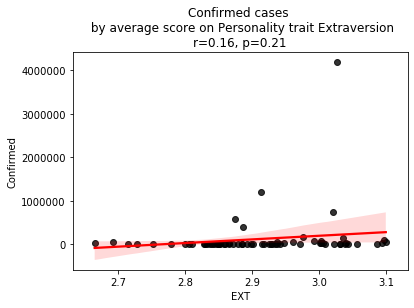

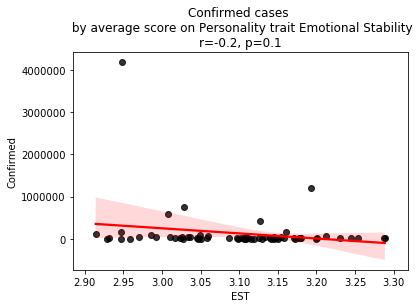

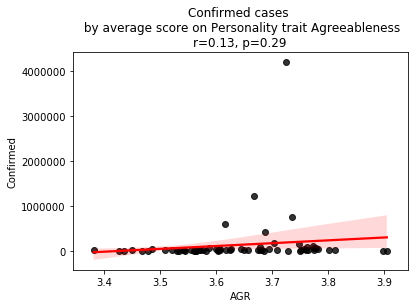

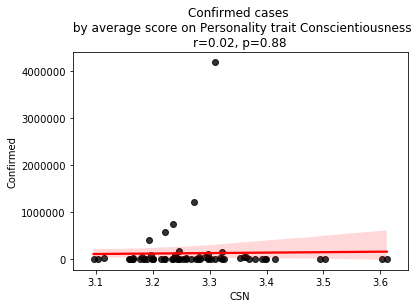

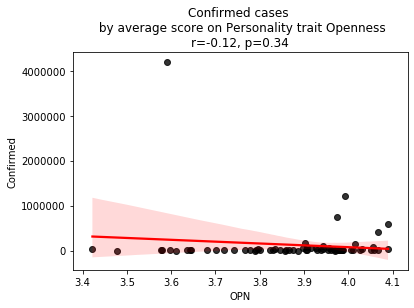

In [144]:
factors = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
factor_names = ['Extraversion', 'Emotional Stability', 'Agreeableness', 'Conscientiousness', 'Openness']

for i, factor in enumerate(['EXT', 'EST', 'AGR', 'CSN', 'OPN']):
    # Compute the correlation coefficient
    corr = pearsonr(final[factor], final.Confirmed)
    corr = [np.round(c, 2) for c in corr]
    text = 'r=%s, p=%s' % (corr[0], corr[1])
    
    ax = sns.regplot(x=factor, 
                y="Confirmed", 
                     scatter_kws={"color": "black"}, line_kws={"color": "red"},
                data=final)
    
    ax.set_title("Confirmed cases " + 
                 "\n by average score on Personality trait " + factor_names[i] + 
                 "\n" + text)
    plt.show()